In [13]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


## Training  

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
X_train = pd.read_csv('cybersecurity_training/cybersecurity_training.csv', delimiter = '|')

In [18]:
Y_train = X_train['notified']

In [19]:
X_train[X_train.isna().any(axis = 1)]

,alert_ids,client_code,notified,categoryname,ip,ipcategory_name,ipcategory_scope,parent_category,grandparent_category,overallseverity,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
0,Nhq,DPM,0,Attack,YT.LB.32.21,INTERNET,Internet,7,A,3,...,4160,675,1,0,2,1,1,1,1,1
1,XZt,FIN,0,Exploit,192.SL.UK.94,PRIV-192,Private network,1,A,5,...,9,2,4,12,3,2,2,2,1,1
2,bBz,CHP,0,Attack,YT.LB.38.21,INTERNET,Internet,7,A,4,...,3788,628,1,0,2,2,1,2,2,1
3,ZNr,HPS,0,Attack,JX.NY.13.20,INTERNET,Internet,7,A,4,...,565,96,0,0,2,2,2,2,2,2
5,ZSX,QWB,0,Exploit,10.FM.RK.37,PRIV-10,Private network,1,A,4,...,13,2,0,0,3,2,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39420,oYN,TRK,0,Attack,YT.LB.34.21,INTERNET,Internet,7,A,5,...,4527,875,0,0,1,1,1,1,1,1
39421,RAk,GBC,1,Control and Maintain,10.XU.RK.81,PRIV-10,Private network,1,A,5,...,2,1,0,0,1,1,1,1,1,1
39422,cWL,LSB,0,Attack,MC.ER.197.27,INTERNET,Internet,7,A,5,...,2742,579,1,0,2,1,1,2,1,1
39423,kaP,ESS,0,Control and Maintain,10.XU.AD.142,PRIV-10,Private network,1,A,3,...,7,4,0,0,3,2,1,3,2,1


In [20]:
del X_train['notified']

In [21]:
X_train.ipcategory_name.unique()
x_train = X_train.select_dtypes(include=[object]).copy()
#x_train.head(3)

le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
x_2 = x_train.apply(le.fit_transform)
#X_2.head()

In [22]:
non_int = list(x_2.columns)

In [23]:
X_train[non_int] = x_2 

In [24]:
X_train.fillna(value='0.5', inplace=True)

In [25]:
X_T, X_Ts, y_T, y_Ts = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# SVM

In [26]:
%%time
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', verbose=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_T, y_T)

#Predict the response for test datasset
y_pred = clf.predict(X_Ts)

[LibSVM]Wall time: 2h 18min 27s


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_Ts, y_pred)

0.9337222081325556

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def plot_svc_decision_function(clf, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [61]:
X_T.shape

(27598, 62)

In [59]:
%%time
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X_T.iloc[:, 1:3])
X_T.iloc[:, 1:3] = imputer.transform(X_T.iloc[:, 1:3])

C:\Users\londh\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Wall time: 9.97 ms


ValueError: X.shape[1] = 2 should be equal to 62, the number of features at training time

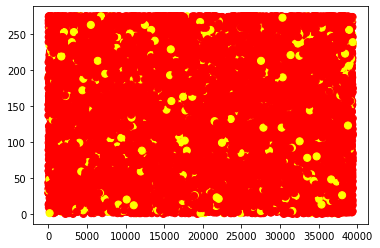

In [68]:
plt.scatter(X_T.iloc[:, 0], X_T.iloc[:, 1], c=y_T, s=50, cmap='autumn')
plot_svc_decision_function(clf)

In [65]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_Ts,y_pred)

array([[11017,   106],
       [  678,    28]], dtype=int64)